## Data from World Happiness Report

The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives, which the report also correlates with various life factors.

In this notebook we will explore the happiness of different countries and the features associated.
The datasets that we will use are available in *Data*: **happiness2020.pkl** and **countries_info.csv**.

Although the features are self-explanatory, here a summary: 

**happiness2020.pkl**
* country: *Name of the country*
* happiness_score: *Happiness score*
* social_support: *Social support (mitigation the effects of inequality)*
* healthy_life_expectancy: *Healthy Life Expectancy*
* freedom_of_choices: *Freedom to make life choices*
* generosity: *Generosity (charity, volunteers)*
* perception_of_corruption: *Corruption Perception*
* world_region: *Area of the world of the country*

**countries_info.csv**
* country_name: *Name of the country*
* area: *Area in sq mi*
* population: *Number of people*
* literacy: *Literacy percentage*

In [231]:
!head Data/countries_info.csv

country_name,area,population,literacy
afghanistan,647500,31056997,"36,0"
albania,28748,3581655,"86,5"
algeria,2381740,32930091,"70,0"
argentina,2766890,39921833,"97,1"
armenia,29800,2976372,"98,6"
australia,7686850,20264082,"100,0"
austria,83870,8192880,"98,0"
azerbaijan,86600,7961619,"97,0"
bahrain,665,698585,"89,1"


In [232]:
import pandas as pd
%matplotlib inline

DATA_FOLDER = 'Data/'

HAPPINESS_DATASET = DATA_FOLDER+"happiness2020.csv"
COUNTRIES_DATASET = DATA_FOLDER+"countries_info.csv"

## Task 1: Load the data

Load the 2 datasets in Pandas dataframes (called *happiness* and *countries*), and show the first rows.


**Hint**: Use the correct reader and verify the data has the expected format.

In [233]:
# Write your code here

hd = pd.read_csv(HAPPINESS_DATASET, index_col='country')
hd

,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
country,,,,,,,
Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia
Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe
Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa
Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean
Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States
...,...,...,...,...,...,...,...
Venezuela,5.0532,0.890408,66.505341,0.623278,-0.169091,0.837038,Latin America and Caribbean
Vietnam,5.3535,0.849987,67.952736,0.939593,-0.094533,0.796421,Southeast Asia
Yemen,3.5274,0.817981,56.727283,0.599920,-0.157735,0.800288,Middle East and North Africa


In [234]:
cd.index.is_unique

True

In [235]:
cd = pd.read_csv(COUNTRIES_DATASET, decimal=",")
cd.head()

,country_name,area,population,literacy
0,afghanistan,647500,31056997,36.0
1,albania,28748,3581655,86.5
2,algeria,2381740,32930091,70.0
3,argentina,2766890,39921833,97.1
4,armenia,29800,2976372,98.6


## Task 2: Let's merge the data

Create a dataframe called *country_features* by merging *happiness* and *countries*. A row of this dataframe must describe all the features that we have about a country.

**Hint**: Verify that all the rows are in the final dataframe.

In [236]:
cd.country_name=cd.country_name.apply(lambda x: x[0].upper()+x[1:])
cd

,country_name,area,population,literacy
0,Afghanistan,647500,31056997,36.0
1,Albania,28748,3581655,86.5
2,Algeria,2381740,32930091,70.0
3,Argentina,2766890,39921833,97.1
4,Armenia,29800,2976372,98.6
...,...,...,...,...
130,Venezuela,912050,25730435,93.4
131,Vietnam,329560,84402966,90.3
132,Yemen,527970,21456188,50.2
133,Zambia,752614,11502010,80.6


In [237]:
# Write your code here
country_features = pd.merge(cd,hd, left_on='country_name', right_index=True, how='left')
country_features

,country_name,area,population,literacy,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
0,Afghanistan,647500,31056997,36.0,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia
1,Albania,28748,3581655,86.5,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe
2,Algeria,2381740,32930091,70.0,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa
3,Argentina,2766890,39921833,97.1,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean
4,Armenia,29800,2976372,98.6,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States
...,...,...,...,...,...,...,...,...,...,...,...
130,Venezuela,912050,25730435,93.4,5.0532,0.890408,66.505341,0.623278,-0.169091,0.837038,Latin America and Caribbean
131,Vietnam,329560,84402966,90.3,5.3535,0.849987,67.952736,0.939593,-0.094533,0.796421,Southeast Asia
132,Yemen,527970,21456188,50.2,3.5274,0.817981,56.727283,0.599920,-0.157735,0.800288,Middle East and North Africa
133,Zambia,752614,11502010,80.6,3.7594,0.698824,55.299377,0.806500,0.078037,0.801290,Sub-Saharan Africa


## Task 3: Where are people happier?

Print the top 10 countries based on their happiness score (higher is better).

In [238]:
country_features.index=country_features.country_name
country_features=country_features.drop('country_name', axis=1)
country_features

,area,population,literacy,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
country_name,,,,,,,,,,
Afghanistan,647500,31056997,36.0,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia
Albania,28748,3581655,86.5,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe
Algeria,2381740,32930091,70.0,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa
Argentina,2766890,39921833,97.1,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean
Armenia,29800,2976372,98.6,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States
...,...,...,...,...,...,...,...,...,...,...
Venezuela,912050,25730435,93.4,5.0532,0.890408,66.505341,0.623278,-0.169091,0.837038,Latin America and Caribbean
Vietnam,329560,84402966,90.3,5.3535,0.849987,67.952736,0.939593,-0.094533,0.796421,Southeast Asia
Yemen,527970,21456188,50.2,3.5274,0.817981,56.727283,0.599920,-0.157735,0.800288,Middle East and North Africa


In [239]:
country_features.happiness_score.sort_values(ascending=False).head(10)

country_name
Finland        7.8087
Denmark        7.6456
Switzerland    7.5599
Iceland        7.5045
Norway         7.4880
Netherlands    7.4489
Sweden         7.3535
Austria        7.2942
Luxembourg     7.2375
Canada         7.2321
Name: happiness_score, dtype: float64

We are interested to know in what world region people are happier. 

Create and print a dataframe with the (1) average happiness score and (2) the number of contries for each world region.
Sort the result to show the happiness ranking.

In [240]:
country_features.groupby('world_region').agg(average_happiness_score=('happiness_score', 'mean'), countries_included=('happiness_score', 'count')).sort_values(by='average_happiness_score', ascending=False)

,average_happiness_score,countries_included
world_region,,
North America and ANZ,7.227450,2
Western Europe,6.957032,19
Latin America and Caribbean,5.898041,17
Central and Eastern Europe,5.812969,13
Southeast Asia,5.517788,8
East Asia,5.483633,3
Commonwealth of Independent States,5.358342,12
Middle East and North Africa,5.079400,14
Sub-Saharan Africa,4.382559,29


The first region has only a few countries! What are them and what is their score?

In [241]:
country_features[country_features.world_region=='North America and ANZ'].happiness_score

country_name
Australia    7.2228
Canada       7.2321
Name: happiness_score, dtype: float64

## Task 4: How literate is the world?

Print the names of the countries with a level of literacy of 100%. 

For each country, print the name and the world region in the format: *{region name} - {country name} ({happiness score})*

In [242]:
country_features.literacy.describe()

count    133.000000
mean      81.851128
std       20.514483
min       17.600000
25%       70.000000
50%       90.900000
75%       98.400000
max      100.000000
Name: literacy, dtype: float64

What is the global average?

In [243]:
country_features.literacy.mean()

81.85112781954886

Calculate the proportion of countries with a literacy level below 50%. Print the value in percentage, formatted with 2 decimals.

In [244]:
ilit = round(len(country_features[country_features.literacy<50.0]) / len(country_features.literacy) ,ndigits=4)
print(f'Percentage of the world that is iliterate: {ilit*100}%')

Percentage of the world that is iliterate: 11.85%


Print the raw number and the percentage of world population that is illiterate.

In [256]:
ilit_pop = (country_features.literacy.apply(lambda x: (100-x)/100)*country_features.population).sum()
ilit_pop_percent = ilit_pop/country_features.population.sum()
print(f"Pop iliterate: {ilit_pop:.2f} iliterate  ({ilit_pop_percent:.2%})")

Pop iliterate: 1249372988.10 iliterate  (20.33%)


## Task 5: Population density

Add to the dataframe a new field called *population_density* computed by dividing *population* by *area*.

In [257]:
# Write your code here
country_features['population_density'] = country_features.population / country_features.area
country_features

,area,population,literacy,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,population_density
country_name,,,,,,,,,,,
Afghanistan,647500,31056997,36.0,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,47.964474
Albania,28748,3581655,86.5,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,124.587971
Algeria,2381740,32930091,70.0,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,13.826065
Argentina,2766890,39921833,97.1,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,14.428413
Armenia,29800,2976372,98.6,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,99.878255
...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,912050,25730435,93.4,5.0532,0.890408,66.505341,0.623278,-0.169091,0.837038,Latin America and Caribbean,28.211650
Vietnam,329560,84402966,90.3,5.3535,0.849987,67.952736,0.939593,-0.094533,0.796421,Southeast Asia,256.108041
Yemen,527970,21456188,50.2,3.5274,0.817981,56.727283,0.599920,-0.157735,0.800288,Middle East and North Africa,40.639029


What is the happiness score of the 3 countries with the lowest population density?

In [247]:
# Write your code here

## Task 6: Healty and happy?

Plot in a scatter plot the happiness score (x) and healty life expectancy (y).

<AxesSubplot:xlabel='happiness_score', ylabel='healthy_life_expectancy'>

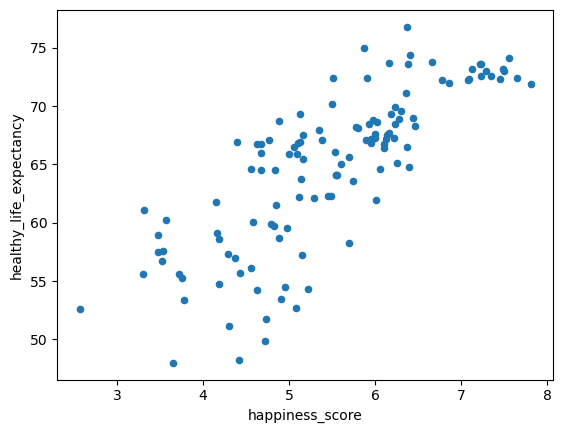

In [259]:
country_features.plot.scatter(x='happiness_score',y='healthy_life_expectancy')

Feel free to continue the exploration of the dataset! We'll release the solutions next week.

----
Enjoy EPFL and be happy, next year Switzerland must be #1.

<AxesSubplot:xlabel='happiness_score', ylabel='population_density'>

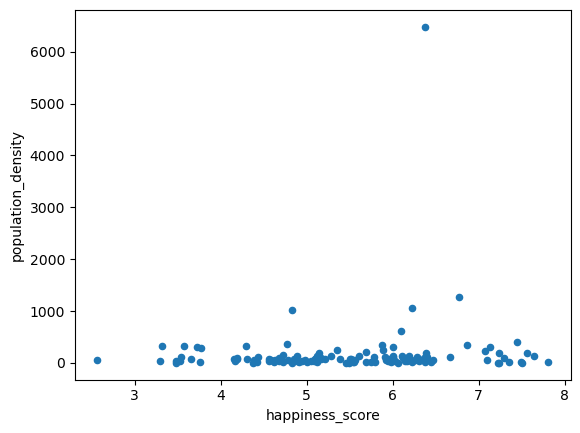

In [268]:
country_features.plot.scatter(x='happiness_score',y='population_density')

In [266]:
import numpy as np
country_features.population_density.apply(np.log).sort_values(ascending=False)
country_features['population_density_log']=country_features.population_density.apply(np.log)

<AxesSubplot:xlabel='happiness_score', ylabel='population_density_log'>

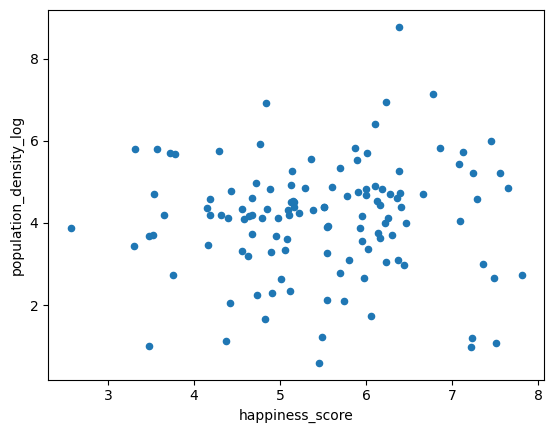

In [267]:
country_features.plot.scatter(x='happiness_score',y='population_density_log')